
## Funções auxiliares

In [15]:
from IPython.display import clear_output
import random
# Iniciando rede neural preditiva

import torch, torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
# %conda install pyserial
import serial

def lerRobo(arduino):
    
    msg = str(arduino.readline()) #Lê os dados em formato de string
    return msg
    
def preverProximoEstado(dados_0,dados_1,dados_2, modeloRobo):
    
    estadoAtual=[]
    for k in dados_0:
        estadoAtual.append(k)
    for k in dados_1:
        estadoAtual.append(k)
    for k in dados_2:
        estadoAtual.append(k)
    
    #converte o vetor do tipo numpy para torch
    x0=torch.from_numpy(np.array(estadoAtual,dtype=np.float)).float()
    
    
    #obtem a saida da rede neural preditiva
    yh0=roboQuadrupede.forward(x0) 
    
    
    vetorPrevisto=[]
    
    for k in yh0:
        vetorPrevisto.append(((k.item()*360)-180))

    
    return vetorPrevisto


def proporAcaoDeControle(erro_X,erro_Y,controlador):
    
    X,Y=setPoint
    
    return [90,90,90,90,90,90,90,90,90,90,90,90]


def torchToNumpy(vetorTorch):
    
    lista=[]
    
    for k in vetorTorch:
        
        lista.append(k.item())
    
    vetorNumpy=np.array(lista)
    
    return vetorNumpy

def construirEstadoComNovoComando(estadoAtual,CMP):
    
    estadoCorrigido=np.zeros(105)
    
    estadoCorrigido=np.array(estadoAtual)
    estadoCorrigido[12]=CMP[0]
    estadoCorrigido[13]=CMP[1]
    estadoCorrigido[14]=CMP[2]
    estadoCorrigido[15]=CMP[3]
    estadoCorrigido[16]=CMP[4]
    estadoCorrigido[17]=CMP[5]
    estadoCorrigido[18]=CMP[6]
    estadoCorrigido[19]=CMP[7]
    estadoCorrigido[20]=CMP[8]
    estadoCorrigido[21]=CMP[9]
    estadoCorrigido[22]=CMP[10]
    estadoCorrigido[23]=CMP[11]
    
    return estadoCorrigido
    
def calcularErro(X,Y,setPoint):
    lossFun=nn.MSELoss()
    
    erro=X-setPoint[0]+Y-setPoint[1]
    
    return erro

def comandarRobo(CM):
    
    return 0


def atualizarEstado(estadoAtual,CM,online,X,Y,disturbio):
    
    if(online):#se estiver online, envia-se o comando ao robo e pega o estado atualizado
        comandarRobo(CM)
        estadoAtualizado=lerRobo()
        
    else: # se estiver offline, atualiza o estado do do robo com base no modelo
        
        # EM: Em será considerado igual ao CM
        # CM: Construido a partir do CM escolhido
        # Gy:  os valores serão estimados com base nas variações em X,Y,z
        # Ac: os valores serão estimados com base nas variações em X,Y,z
        #Tmp: utiliza uma constante
        #ult: Utiliza uma constante
        #X,Y,Z: X e y serão os valores previstos, z será constante
        estadoAtualizado=np.zeros(105)
        
        
        estadoAtualizado[0]=CM[0]
        estadoAtualizado[1]=CM[1]
        estadoAtualizado[2]=CM[2]
        estadoAtualizado[3]=CM[3]
        estadoAtualizado[4]=CM[4]
        estadoAtualizado[5]=CM[5]
        estadoAtualizado[6]=CM[6]
        estadoAtualizado[7]=CM[7]
        estadoAtualizado[8]=CM[8]
        estadoAtualizado[9]=CM[9]
        estadoAtualizado[10]=CM[10]
        estadoAtualizado[11]=CM[11]
        
        estadoAtualizado[12]=CM[0]
        estadoAtualizado[13]=CM[1]
        estadoAtualizado[14]=CM[2]
        estadoAtualizado[15]=CM[3]
        estadoAtualizado[16]=CM[4]
        estadoAtualizado[17]=CM[5]
        estadoAtualizado[18]=CM[6]
        estadoAtualizado[19]=CM[7]
        estadoAtualizado[20]=CM[8]
        estadoAtualizado[21]=CM[9]
        estadoAtualizado[22]=CM[10]
        estadoAtualizado[23]=CM[11]
        
        
        estadoAtualizado[24]=0
        estadoAtualizado[25]=0
        estadoAtualizado[26]=0
        
        
        estadoAtualizado[27]=0
        estadoAtualizado[28]=0
        estadoAtualizado[29]=0
        
        estadoAtualizado[30]=25
        
        estadoAtualizado[31]=10
        
        estadoAtualizado[32]=X+random.randint(-1*disturbio,disturbio)
        estadoAtualizado[33]=Y+random.randint(-1*disturbio,disturbio)
        estadoAtualizado[34]=0
        
        
        estadoAtualizado[35]=estadoAtual[0]
        estadoAtualizado[36]=estadoAtual[1]
        estadoAtualizado[37]=estadoAtual[2]
        estadoAtualizado[38]=estadoAtual[3]
        estadoAtualizado[39]=estadoAtual[4]
        estadoAtualizado[40]=estadoAtual[5]
        estadoAtualizado[41]=estadoAtual[6]
        estadoAtualizado[42]=estadoAtual[7]
        estadoAtualizado[43]=estadoAtual[8]
        estadoAtualizado[44]=estadoAtual[9]
        estadoAtualizado[45]=estadoAtual[10]
        estadoAtualizado[46]=estadoAtual[11]
        estadoAtualizado[47]=estadoAtual[12]
        estadoAtualizado[48]=estadoAtual[13]
        estadoAtualizado[49]=estadoAtual[14]
        estadoAtualizado[50]=estadoAtual[15]
        estadoAtualizado[51]=estadoAtual[16]
        estadoAtualizado[52]=estadoAtual[17]
        estadoAtualizado[53]=estadoAtual[18]
        estadoAtualizado[54]=estadoAtual[19]
        estadoAtualizado[55]=estadoAtual[20]
        estadoAtualizado[56]=estadoAtual[21]
        estadoAtualizado[57]=estadoAtual[22]
        estadoAtualizado[58]=estadoAtual[23]
        estadoAtualizado[59]=estadoAtual[24]
        estadoAtualizado[60]=estadoAtual[25]
        estadoAtualizado[61]=estadoAtual[26]
        estadoAtualizado[62]=estadoAtual[27]
        estadoAtualizado[63]=estadoAtual[28]
        estadoAtualizado[64]=estadoAtual[29]
        estadoAtualizado[65]=estadoAtual[30]
        estadoAtualizado[66]=estadoAtual[31]
        estadoAtualizado[66]=estadoAtual[32]
        estadoAtualizado[66]=estadoAtual[33]
        estadoAtualizado[69]=estadoAtual[34]
        
        estadoAtualizado[70]=estadoAtual[35]
        estadoAtualizado[71]=estadoAtual[36]
        estadoAtualizado[72]=estadoAtual[37]
        estadoAtualizado[73]=estadoAtual[38]
        estadoAtualizado[74]=estadoAtual[39]
        estadoAtualizado[75]=estadoAtual[40]
        estadoAtualizado[76]=estadoAtual[41]
        estadoAtualizado[77]=estadoAtual[42]
        estadoAtualizado[78]=estadoAtual[43]
        estadoAtualizado[79]=estadoAtual[44]
        estadoAtualizado[80]=estadoAtual[45]
        estadoAtualizado[81]=estadoAtual[46]
        estadoAtualizado[82]=estadoAtual[47]
        estadoAtualizado[83]=estadoAtual[48]
        estadoAtualizado[84]=estadoAtual[49]
        estadoAtualizado[85]=estadoAtual[50]
        estadoAtualizado[86]=estadoAtual[51]
        estadoAtualizado[87]=estadoAtual[52]
        estadoAtualizado[88]=estadoAtual[53]
        estadoAtualizado[89]=estadoAtual[54]
        estadoAtualizado[90]=estadoAtual[55]
        estadoAtualizado[91]=estadoAtual[56]
        estadoAtualizado[92]=estadoAtual[57]
        estadoAtualizado[93]=estadoAtual[58]
        estadoAtualizado[94]=estadoAtual[59]
        estadoAtualizado[95]=estadoAtual[60]
        estadoAtualizado[96]=estadoAtual[61]
        estadoAtualizado[97]=estadoAtual[62]
        estadoAtualizado[98]=estadoAtual[63]
        estadoAtualizado[99]=estadoAtual[64]
        estadoAtualizado[100]=estadoAtual[65]
        estadoAtualizado[101]=estadoAtual[66]
        estadoAtualizado[102]=estadoAtual[67]
        estadoAtualizado[103]=estadoAtual[68]
        estadoAtualizado[104]=estadoAtual[69]
        
        return estadoAtualizado

        



In [16]:
# %conda install pytorch torchvision torchaudio cpuonly -c pytorch
import torch, torchvision
import numpy as np
import time
def buscaLinha(arq,i):
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            if(cont==i):
                linha=linha.replace("{","") #retira a chave da linha
                linha=linha.replace("}","")# retira a chave da linha
                return linha
def tratarX(x):
    xLista=[]
    xTratado=x.split()
    cont=0
    
    for k in xTratado:
        if(cont>2):
            xLista.append(k)
        cont=cont+2
    
    linhaString=""
    
    for k in xLista:
        linhaString=linhaString+k+" "
    return linhaString
    
    
def gerarDadosTrain(arq):#Cria dados de treinamento xTrain e yTrain a partir de um arquivo
    xTrain=[]
    yTrain=[]
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    tamanhox=0
    tamanhoy=0
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            linha=linha.replace("{","") #retira a chave da linha
            linha=linha.replace("}","")# retira a chave da linha
            #print("Linha: "+ str(cont))# exibe o numero da linha
            #print(linha)#Exibe a linha
            if(cont>=4):#se a linha for 4 ou maior, ja pode criar os dados, pois utiliza-se as 3 linhas anteriores como entrada
                linhay=buscaLinha(arq,cont)
                listaS=linhay.split()
                listaSTratada=[]
                contCaracter=0
                for k in listaS:
                    contCaracter=contCaracter+1
#                     if((contCaracter>2 and contCaracter<=14) or contCaracter>26):
#                         listaSTratada.append(k)
                    if(contCaracter>34 and contCaracter<37):
                        listaSTratada.append(k)
                saida=np.array(listaSTratada,dtype=float)
#                 saida[0]=saida[0]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[1]=saida[1]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[2]=saida[2]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[3]=saida[3]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[4]=saida[4]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[5]=saida[5]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[6]=saida[6]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[7]=saida[7]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[8]=saida[8]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[9]=saida[9]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[10]=saida[10]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[11]=saida[11]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                
#                 saida[12]=((saida[12])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[13]=((saida[13])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[14]=((saida[14])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
                
#                 saida[15]=((saida[15])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[16]=((saida[16])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[17]=((saida[17])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
                
#                 saida[18]=(saida[18])/100#Alterando escala da temperatura(0 a 100) para (0 a 1)
#                 saida[19]=(saida[19])/100#Alterando escala da semsor ultrassonico(0 a 100) para (0 a 1)
#                 saida[20]=((saida[20])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[21]=((saida[21])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[22]=((saida[22])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                saida[0]=((saida[0])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                saida[1]=((saida[1])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[2]=((saida[2])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                cont2=0
                for k in saida:
                    if(k>1):
                        saida[cont2]=1
                    if(k<0):
                        saida[cont2]=0
                    cont2=cont2+1
                    
                tamanhoy=len(saida)
                yTrain.append(saida)
                
                linhax1=tratarX(buscaLinha(arq,cont-1))
                linhax2=tratarX(buscaLinha(arq,cont-2))
                linhax3=tratarX(buscaLinha(arq,cont-3))
                
                linhax=linhax1.replace("\n","")+linhax2.replace("\n","")+linhax3.replace("\n","")
                entrada=np.array(linhax.split(),dtype=float)
                
                tamanhox=len(entrada)
                
                xTrain.append(entrada)
                
#     print("Dados de treinamento criados a partir do arquivo "+arq)  
#     print("Tamanho das entradas: "+str(tamanhox))
#     print("Tamanho das saídas: "+str(tamanhoy))
#     print("Quantidade de dados: " +str(cont))
    
    yTrainTorch=torch.from_numpy(np.array(yTrain,dtype=np.float)).float()
    xTrainTorch=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()
    return xTrainTorch,yTrainTorch
import numpy as np
# def criarDadosTrainControlador(nome_do_arquivo):
#     # Abre o arquivo em modo de leitura ('r')
#     with open(nome_do_arquivo, 'r') as arquivo:
#         # Lê todas as linhas do arquivo e armazena em uma lista
#         linhas = arquivo.readlines()

#     # Agora, a lista "linhas" contém todas as linhas do arquivo
#     X_Train=[]
#     Y_Train=[]
#     for linha in linhas:
#         try:
            
#             # Remove os caracteres "{" e "}" da linha e, em seguida, divide os valores pelos espaços em branco
#             valores_str = linha.replace("{", "").replace("}", "").split()

#             # Converte os valores para float
#             valores_float = np.array(valores_str, dtype=float)
#             valores_int=np.array(valores_float//1,dtype=int)

#             # Mantém apenas o penúltimo e o antepenúltimo elementos do array
#             posicaoDesejada=valores_int[-3:-1]
#             CMIdeal=valores_int[2:14]

#     #         print(posicaoDesejada)
#     #         print(CMIdeal)
#             X_Train.append(posicaoDesejada)
#             Y_Train.append(CMIdeal)
#         except:
#             erro="Erro na linha"
            
#     yTrainTorch=torch.from_numpy(np.array(Y_Train,dtype=np.float)).float()
#     xTrainTorch=torch.from_numpy(np.array(X_Train,dtype=np.float)).float()
#     return xTrainTorch,yTrainTorch
    
# def criarDadosTrainControlador(nome_do_arquivo):
#     # Abre o arquivo em modo de leitura ('r')
#     with open(nome_do_arquivo, 'r') as arquivo:
#         # Lê todas as linhas do arquivo e armazena em uma lista
#         linhas = arquivo.readlines()

#     # Agora, a lista "linhas" contém todas as linhas do arquivo
#     X_Train = []
#     Y_Train = []
#     for linha in linhas:
#         try:
#             # Remove os caracteres "{" e "}" da linha e, em seguida, divide os valores pelos espaços em branco
#             valores_str = linha.replace("{", "").replace("}", "").split()
            

#             # Converte os valores para float
#             valores_float = np.array(valores_str, dtype=float)
#             valores_int = np.array(valores_float // 1, dtype=int)
#             if(len(valores_int)==37):
#                 # Mantém apenas o penúltimo e o antepenúltimo elementos do array
#                 posicaoDesejada = valores_int[-3:-1]
#                 CMIdeal = valores_int[2:14]

#                 # Armazena a lista CMIdeal na lista Y_Train
#                 Y_Train.append(CMIdeal)

#                 # Armazena a lista posicaoDesejada na lista X_Train
#                 X_Train.append(posicaoDesejada)
#         except:
#             erro = "Erro na linha"

#     yTrainTorch = torch.from_numpy(np.array(Y_Train, dtype=np.float)).float()
#     xTrainTorch = torch.from_numpy(np.array(X_Train, dtype=np.float)).float()
#     return xTrainTorch, yTrainTorch       

def criarDadosTrainControlador(nome_do_arquivo):
    # Abre o arquivo em modo de leitura ('r')
    with open(nome_do_arquivo, 'r') as arquivo:
        # Lê todas as linhas do arquivo e armazena em uma lista
        linhas = arquivo.readlines()

    # Agora, a lista "linhas" contém todas as linhas do arquivo
    X_Train = []
    Y_Train = []
    numero_corte = random.random()
    print("Numero de corte :"+ str(numero_corte))
    for linha in linhas:
        try:
            linhaTratada=linha.replace("(","").replace(")={"," ").replace(","," ").replace("}:"," ")
#             print(linhaTratada)
            # Remove os caracteres "{" e "}" da linha e, em seguida, divide os valores pelos espaços em branco
            valores_str = linhaTratada.split()
            
            


            valores_float = np.array(valores_str, dtype=float)
            valores_int = np.array(valores_float // 1, dtype=int)
            rec=valores_float[-1]

            if(rec>numero_corte):
                print(rec)

                x=valores_int[0]
                y=valores_int[1]
                entrada=[x,y]

                cmIdeal=valores_int[2:14]
                X_Train.append(entrada)
                Y_Train.append(cmIdeal)
            
            
        except:
            print("linha invalida")


    yTrainTorch = torch.from_numpy(np.array(Y_Train, dtype=float)).float()
    xTrainTorch = torch.from_numpy(np.array(X_Train, dtype=float)).float()
    return xTrainTorch, yTrainTorch       
# criarDadosTrainControlador("politica.txt")           

In [17]:
# %conda install -c anaconda pytorch
criarDadosTrainControlador("politica.txt")

Numero de corte :0.21630538192393434
linha invalida
1.0
1.0


(tensor([[-30.,   3.],
         [  0.,   0.]]),
 tensor([[100.,  99.,  64.,  74.,  75.,  75.,  84.,  89.,  65., 100.,  74.,  64.],
         [ 90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.]]))

## 1.0 Iniciando rede neural preditiva pré treinada

In [18]:
from torch import nn
import torch.nn.functional as F
class redeNeuralPreditiva(nn.Module):
    tamanhoEntrada=105
    tamanhoSaida=2
    def __init__(self):
        super(redeNeuralPreditiva, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,105)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(105,80)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(80,70)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(70,60)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(60,30)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(30,16)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(16,8)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(8,4)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(4,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        
        self.melhorErro=1000000



    def forward(self, X):
       

        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    
# class ControladorNeural(nn.Module):
#     tamanhoEntrada=23
#     tamanhoSaida=12
#     def __init__(self):
#         super(ControladorNeural, self).__init__()
#           #define a arquitetura
#         self.linear1=nn.Linear(self.tamanhoEntrada,20)
#         self.act1=nn.ReLU6()

#         self.linear2=nn.Linear(20,20)
#         self.act2=nn.ReLU6()

#         self.linear3=nn.Linear(20,18)
#         self.act3=nn.ReLU6()
        
#         self.linear4=nn.Linear(18,18)
#         self.act4=nn.ReLU6()
        
#         self.linear5=nn.Linear(18,16)
#         self.act5=nn.ReLU6()

#         self.linear6=nn.Linear(16,16)
#         self.act6=nn.ReLU6()

#         self.linear7=nn.Linear(16,14)
#         self.act7=nn.ReLU6()
        
#         self.linear8=nn.Linear(14,14)
#         self.act8=nn.ReLU6()
        
#         self.linear9=nn.Linear(14,self.tamanhoSaida)
#         self.act9=nn.Sigmoid()
        
        


#     def forward(self, X):
       
    
#         v1=self.linear1(X)
#         a1=self.act1(v1)
        
#         v2=self.linear2(a1)
#         a2=self.act2(v2)
        
#         v3=self.linear3(a2)
#         a3=self.act3(v3)
        
#         v4=self.linear4(a3)
#         a4=self.act4(v4)
        
#         v5=self.linear5(a4)
#         a5=self.act5(v5)
        
#         v6=self.linear6(a5)
#         a6=self.act6(v6)
        
#         v7=self.linear7(a6)
#         a7=self.act7(v7)
        
#         v8=self.linear8(a7)
#         a8=self.act8(v8)
        
        
#         vS=self.linear9(a8)
#         yh=self.act9(vS)
#         return yh
    
# print("Iniciando rede neural preditiva ...")
# roboQuadrupede=redeNeuralPreditiva()

# roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
# roboQuadrupede.eval()
# file1 = open("melhorErroPreditiva.txt", "r")  # append mode
# roboQuadrupede.melhorErro=float(file1.read())
# file1.close()
# print("Rede neural preditiva iniciada")
    

## 2.0 Criando Controlador Neural



In [19]:
class ControladorNeural(nn.Module):
    tamanhoEntrada=2
    tamanhoSaida=12
    
    
    def __init__(self):
        super(ControladorNeural, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,4)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(4,2)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(2,4)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(4,8)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(8,9)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(9,10)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(10,11)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(11,12)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(12,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        
        self.melhorErro=1000000
        
        
    def penalizar(self):
        
        #Algoritmo que faz o erro medio quadratico entre Y e Yh
        # salvar os parametros da rede neural
        criarArquivoTreinamento=1#Essa linha é só para nao ficar vazio
       

        
        # Armanzenar em uma lista, os valores de X, yh e Y
        
        
    def recompensar(self):
        # salvar os parametros da rede neural
        salvar=1#Essa linha é só para nao ficar vazio
        
        
        
    def forward(self, X):
       

        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    

In [20]:
import os
def buscar(palavra, nomeDoArquivo):
    # Inicializa o número da linha como zero (nenhuma linha encontrada ainda)
    numeroDaLinha = 0

    # Abre o arquivo em modo de leitura
    with open(nomeDoArquivo, 'r') as arquivo:
        # Percorre todas as linhas do arquivo
        for numeroDaLinha, linha in enumerate(arquivo, 1):
            # Verifica se a palavra está na linha
            if palavra in linha:
                # Retorna o número da linha em que a palavra foi encontrada
                return numeroDaLinha

    # Caso a palavra não tenha sido encontrada, retorna -1
    return -1
def conteudo_linha_n(nome_arquivo, n):
    try:
        with open(nome_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()
            if 1 <= n <= len(linhas):
                return linhas[n - 1].strip()
            else:
                print(f"A linha {n} não existe no arquivo.")
                return None
    except FileNotFoundError:
        print(f"O arquivo '{nome_arquivo}' não foi encontrado.")
        return None
    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo: {e}")
        return None

if __name__ == "__main__":
    arquivo_txt = "politica.txt"
    numero_linha = 3  # Substitua o número da linha desejada aqui

    conteudo = conteudo_linha_n(arquivo_txt, numero_linha)

    if conteudo:
        print(f"Conteúdo da linha {numero_linha}: {conteudo}")
def substituir(numeroDaLinha, nomeDoArquivo, novoDado):
    # Lê todas as linhas do arquivo
    with open(nomeDoArquivo, 'r') as arquivo:
        linhas = arquivo.readlines()

    # Verifica se o número da linha está dentro do intervalo válido
    if numeroDaLinha <= 0 or numeroDaLinha > len(linhas):
        raise ValueError("Número de linha inválido")

    # Substitui a linha pelo novo dado
    linhas[numeroDaLinha - 1] = novoDado + '\n'

    # Escreve as linhas atualizadas de volta no arquivo
    with open(nomeDoArquivo, 'w') as arquivo:
        arquivo.writelines(linhas)

class PIDController:
    #Alguns resultados obtidos:
#     {90 90 90 90 90 90 90 90 90 90 90 90} :(0,0)#todos em 90 graus
#     {50 50 30 50 20 20 40 50 30 50 20 20} :(-14,6)#todos em seus mínimos
#     {150 150 100 100 130 130 130 130 100 150 130 110} :(1,-1)#todos em seus máximos
#     {50, 50, 35, 25, 55, 55, 45, 40, 35, 50, 55, 45} :(-30,5)#Todos no meio entre o min e o max
#     {90 150 90 100 90 130 90 130 90 150 90 110} :(9,5)#Impar em 90, par no max
#     {90 50 90 50 90 20 90 50 90 50 90 20} :(-17,6)#Impar em 90, par no min

#Proxima tarefa
#Descobrir quais comandos resultam nos seguintes angulos:


#(0,10)
#(0,20)
#(0,30)
#(0,40)
#(0,50)


#(0,-10)
#(0,-20)
#(0,-30)
#(0,-40)
#(0,-50)


#(10,0)
#(20,0)
#(30,0)
#(40,0)
#(50,0)


#(-10,0)
#(-20,0)
#(-30,0)
#(-40,0)
#(-50,0)

#(10,10)
#(20,20)
#(30,30)
#(40,40)
#(50,50)

#(-10,-10)
#(-20,-20)
#(-30,-30)
#(-40,-40)
#(-50,-50)


#Criar um arquivo base para o controlador aprender
    arquivoPolitica="politica.txt"

    # Defina os limites dos ângulos dos servomotores
    MIN_ANGLE = 70
    MAX_ANGLE = 130
    periodo=1#de quanto em quanto tempo o controlador ira enviar um novo comando
    
    
    #Limite inferior de cada servo
    MIN_ANGLECM1=50
    MIN_ANGLECM2=50#defeito
    MIN_ANGLECM3=30
    MIN_ANGLECM4=50
    MIN_ANGLECM5=20
    MIN_ANGLECM6=20
    MIN_ANGLECM7=40
    MIN_ANGLECM8=50#defeito
    MIN_ANGLECM9=30
    MIN_ANGLECM10=50
    MIN_ANGLECM11=20
    MIN_ANGLECM12=20
    
    #Limite Superior de cada servo
    MAX_ANGLECM1=150
    MAX_ANGLECM2=150#defeito
    MAX_ANGLECM3=100
    MAX_ANGLECM4=100
    MAX_ANGLECM5=130
    MAX_ANGLECM6=130
    MAX_ANGLECM7=130
    MAX_ANGLECM8=130#defeito
    MAX_ANGLECM9=100
    MAX_ANGLECM10=150
    MAX_ANGLECM11=130
    MAX_ANGLECM12=110

        
    def __init__(self, Kp, Ki, Kd,controladorNeural):
        self.ultimoComando=time.time()
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        
        self.erroAnterior = 0
        self.erro_integral = 0
        
        self.CM1=90 #angulo atual do servo 1
        self.CM2=90 #angulo atual do servo 2
        self.CM3=90 #angulo atual do servo 3
        self.CM4=90 #angulo atual do servo 4
        self.CM5=90 #angulo atual do servo 5
        self.CM6=90 #angulo atual do servo 6
        self.CM7=90 #angulo atual do servo 7
        self.CM8=90 #angulo atual do servo 8
        self.CM9=90 #angulo atual do servo 9
        self.CM10=90 #angulo atual do servo 10
        self.CM11=90 #angulo atual do servo 11
        self.CM12=90 #angulo atual do servo 12
        
        self.CM1A=90 #angulo anteior do servo 1
        self.CM2A=90 #angulo anteior do servo 2
        self.CM3A=90 #angulo anteior do servo 3
        self.CM4A=90 #angulo anteior do servo 4
        self.CM5A=90 #angulo anteior do servo 5
        self.CM6A=90 #angulo anteior do servo 6
        self.CM7A=90 #angulo anteior do servo 7
        self.CM8A=90 #angulo anteior do servo 8
        self.CM9A=90 #angulo anteior do servo 9
        self.CM10A=90 #angulo anteior do servo 10
        self.CM11A=90 #angulo anteior do servo 11
        self.CM12A=90 #angulo anteior do servo 12
        self.controladorNeural=controladorNeural
        
        self.cont=1
        if not os.path.exists(self.arquivoPolitica):
            
            # Se não existe, cria o arquivo e escreve a frase "arquivo gerado"
            arquivo=open(self.arquivoPolitica, 'a')
            arquivo.write("(Ângulo)={Ação Tomada}:Recompensa\n")
            for x in range(180):
                for y in range(180):
                    CM1 = random.randint(self.MIN_ANGLECM1, self.MAX_ANGLECM1)
                    CM2 = random.randint(self.MIN_ANGLECM2, self.MAX_ANGLECM2)
                    CM3 =  random.randint(self.MIN_ANGLECM3, self.MAX_ANGLECM3)
                    CM4 =  random.randint(self.MIN_ANGLECM4, self.MAX_ANGLECM4)
                    CM5 =  random.randint(self.MIN_ANGLECM5, self.MAX_ANGLECM5)
                    CM6 =  random.randint(self.MIN_ANGLECM6, self.MAX_ANGLECM6)
                    CM7 =  random.randint(self.MIN_ANGLECM7, self.MAX_ANGLECM7)
                    CM8 =  random.randint(self.MIN_ANGLECM8, self.MAX_ANGLECM8)
                    CM9 =  random.randint(self.MIN_ANGLECM9, self.MAX_ANGLECM9)
                    CM10 =  random.randint(self.MIN_ANGLECM10, self.MAX_ANGLECM10)
                    CM11 =  random.randint(self.MIN_ANGLECM11, self.MAX_ANGLECM11)
                    CM12 =  random.randint(self.MIN_ANGLECM12, self.MAX_ANGLECM12)

                    arquivo.write("("+str(x-90)+","+str(y-90)+")={"+str(CM1)+","+str(CM2)+","+str(CM3)+","+str(CM4)+","+str(CM5)+","+str(CM6)+","+str(CM7)+","+str(CM8)+","+str(CM9)+","+str(CM10)+","+str(CM11)+","+str(CM12)+"}:0.00\n")
            arquivo.close()
            print(f"Arquivo '{self.arquivoPolitica}' criado e a frase foi escrita.")
        else:
            print(f"O arquivo '{self.arquivoPolitica}' já existe.")


    def atualizarPolitica(self,X, Y):
        xDesejado=int(X)
        yDesejado=int(Y)
        recompensas=[]#lista de recompensas
        angulosObtidos=[]#Lista de resultados obtidos
        acoes=[]#historico de acoes
        erro=True
        while(erro==True):
            try:
                arquivo=open("recompensa.txt",'r')
                linhas = arquivo.readlines()
                arquivo.close()
                erro=False
            except:
                erro=True
        erro=True
        for linha in linhas:
            linhaTratada=linha.replace("(","").replace(")={"," ").replace(","," ").replace("}:"," ")
            valores_str=linhaTratada.split()
            try:
                valores_float = np.array(valores_str, dtype=float)

                if(len(valores_float)==15):
                    recompensa=valores_float[-1]
                    anguloObtido=np.array(valores_float[0:2],dtype=int)
                    acao=np.array(valores_float[2:14],dtype=float)

                    recompensas.append(recompensa)
                    angulosObtidos.append(anguloObtido)
                    acoes.append(acao)


            except:
                linhaInvalida=True

        #Colhe as recompensas
        mediaRecompesa=np.mean(recompensas)
        print(mediaRecompesa)
        for k in range(len(recompensas)):
            anguloObtido=angulosObtidos[k]
            politica="("+str(anguloObtido[0])+","+str(anguloObtido[1])+str(")")
            acao=acoes[k]
            n=buscar(politica,"politica.txt")


            conteudo = conteudo_linha_n("politica.txt", n)

            if conteudo:
    #             print(f"Conteúdo da linha {numero_linha}: {conteudo}")
    #             print("Novo conteudo: ",end="")
                novoConteudo=politica+"={"
                novoConteudo+=str(acao[0])+","
                novoConteudo+=str(acao[1])+","
                novoConteudo+=str(acao[2])+","
                novoConteudo+=str(acao[3])+","
                novoConteudo+=str(acao[4])+","
                novoConteudo+=str(acao[5])+","
                novoConteudo+=str(acao[6])+","
                novoConteudo+=str(acao[7])+","
                novoConteudo+=str(acao[8])+","
                novoConteudo+=str(acao[9])+","
                novoConteudo+=str(acao[10])+","
                novoConteudo+=str(acao[11])+"}:1.00"
                substituir(n, "politica.txt", novoConteudo)

        #Registra a penalidade
        politica="("+str(xDesejado)+","+str(yDesejado)+str(")")
    #     print("penalizando a politica "+politica)
        n=buscar(politica,"politica.txt")
        conteudo = conteudo_linha_n("politica.txt", n)
        if conteudo:
            print(conteudo)
            endDoisPontos=conteudo.find(":")
            parteSubstituida=conteudo[endDoisPontos+1:]
            print(parteSubstituida)
            novoConteudo=conteudo.replace(parteSubstituida,str(mediaRecompesa))
            print(novoConteudo)
            substituir(n, "politica.txt", novoConteudo)

                   
    def importarRedeNeural(self,controladorNeural):
        self.controladorNeural=controladorNeural
    def recompensar():
        return 1
    def penalizar():
        return 1

    def update(self, setpoint_x, setpoint_y, current_x, current_y):
        
        
        
        if((time.time()-self.ultimoComando)>self.periodo):
            
            self.CM1A=self.CM1
            self.CM2A=self.CM2
            self.CM3A=self.CM3
            self.CM4A=self.CM4
            self.CM5A=self.CM5
            self.CM6A=self.CM6
            self.CM7A=self.CM7
            self.CM8A=self.CM8
            self.CM9A=self.CM9
            self.CM10A=self.CM10
            self.CM11A=self.CM11
            self.CM12A=self.CM12
            
            
            entrada=np.array([setpoint_x,setpoint_y],dtype=np.float)
            x0=torch.from_numpy(entrada).float()#testeval
            yh0=controlador.forward(x0)
            novosComandos=np.array((180*yh0.detach().numpy()//1),dtype=np.int)
            
            CM1=novosComandos[0]
            CM2=novosComandos[1]
            CM3=novosComandos[2]
            CM4=novosComandos[3]
            CM5=novosComandos[4]
            CM6=novosComandos[5]
            CM7=novosComandos[6]
            CM8=novosComandos[7]
            CM9=novosComandos[8]
            CM10=novosComandos[9]
            CM11=novosComandos[10]
            CM12=novosComandos[11]
            
            # Garantir que os valores estejam acima do valor mínimo
            CM1 = max(self.MIN_ANGLECM1, CM1)
            CM2 = max(self.MIN_ANGLECM2, CM2)
            CM3 = max(self.MIN_ANGLECM3, CM3)
            CM4 = max(self.MIN_ANGLECM4, CM4)
            CM5 = max(self.MIN_ANGLECM5, CM5)
            CM6 = max(self.MIN_ANGLECM6, CM6)
            CM7 = max(self.MIN_ANGLECM7, CM7)
            CM8 = max(self.MIN_ANGLECM8, CM8)
            CM9 = max(self.MIN_ANGLECM9, CM9)
            CM10 = max(self.MIN_ANGLECM10, CM10)
            CM11 = max(self.MIN_ANGLECM11, CM11)
            CM12 = max(self.MIN_ANGLECM12, CM12)

            # Garantir que os valores estejam abaixo do valor máximo
            CM1 = min(self.MAX_ANGLECM1, CM1)
            CM2 = min(self.MAX_ANGLECM2, CM2)
            CM3 = min(self.MAX_ANGLECM3, CM3)
            CM4 = min(self.MAX_ANGLECM4, CM4)
            CM5 = min(self.MAX_ANGLECM5, CM5)
            CM6 = min(self.MAX_ANGLECM6, CM6)
            CM7 = min(self.MAX_ANGLECM7, CM7)
            CM8 = min(self.MAX_ANGLECM8, CM8)
            CM9 = min(self.MAX_ANGLECM9, CM9)
            CM10 = min(self.MAX_ANGLECM10, CM10)
            CM11 = min(self.MAX_ANGLECM11, CM11)
            CM12 = min(self.MAX_ANGLECM12, CM12)
            
            
            self.CM1=CM1
            self.CM2=CM2
            self.CM3=CM3
            self.CM4=CM4
            self.CM5=CM5
            self.CM6=CM6
            self.CM7=CM7
            self.CM8=CM8
            self.CM9=CM9
            self.CM10=CM10
            self.CM11=CM11
            self.CM12=CM12

        comandoAtualizado=np.array([self.CM1,self.CM2,self.CM3,self.CM4,self.CM5,self.CM6,self.CM7,self.CM8,self.CM9,self.CM10,self.CM11,self.CM12])
        return comandoAtualizado
    


Conteúdo da linha 3: (-90,-89)={59,140,80,50,117,102,88,83,85,111,25,27}:0.00


In [21]:
# # controladorPID=PIDController(0.1,0.01,0.001,controlador)
# print(controladorPID.update(0, 0, -2, 16))

# 3.0 algoritmo de treinamento

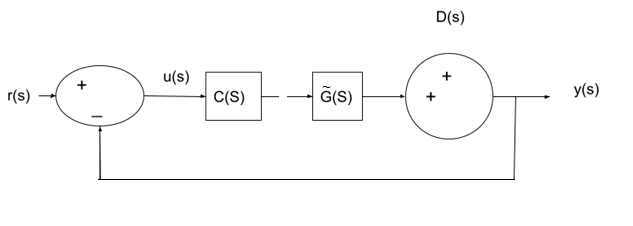

In [22]:
controlador=ControladorNeural()#Inicia o controlador
controladorPID=PIDController(0.01,0,0.000,controlador)

try:
    controlador.load_state_dict(torch.load("parametrosControlador.pt"))
    controlador.eval()
    file1 = open("melhorErroControlador.txt", "r")  # append mode
    controlador.melhorErro=float(file1.read())
    file1.close()
    
except:
    print("O modelo nao existe, criando o novo")
    torch.save(controlador.state_dict(), "parametrosControlador.pt")
    file1 = open("melhorErroControlador.txt", "w")  # append mode
    file1.write("1000")
    file1.close()

roboQuadrupede=redeNeuralPreditiva()

try:
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    file1 = open("melhorErroPreditiva.txt", "r")  # append mode
    roboQuadrupede.melhorErro=float(file1.read())
    file1.close()
    
except:
    print("O modelo nao existe, criando o novo")
    torch.save(roboQuadrupede.state_dict(), "parametrosRedePreditiva.pt")
    file1 = open("melhorErroPreditiva.txt", "w")  # append mode
    file1.write("1000")
    file1.close()

O arquivo 'politica.txt' já existe.


In [23]:
#definicoes
online=False
import random
from serial.tools import list_ports

def listar_portas_disponiveis():
    return [porta.device for porta in list_ports.comports()]

def abrir_porta_serial(nome_porta, velocidade=9600):
    if nome_porta not in listar_portas_disponiveis():
        print(f"Porta serial {nome_porta} não está conectada.")
        return None,-1

    try:
        porta_serial = serial.Serial(nome_porta, velocidade)
        print(f"Porta serial {nome_porta} aberta com sucesso.")
        return porta_serial,0
    except serial.SerialException:
        print(f"Porta serial {nome_porta} está em uso. Tentando fechar...")
        try:
            porta_serial = serial.Serial()
            porta_serial.port = nome_porta
            porta_serial.close()
            print(f"Porta serial {nome_porta} fechada com sucesso.")
            return None,1
        except serial.SerialException:
            print(f"Não foi possível fechar a porta serial {nome_porta}.")
        return None,2


arduino,status = abrir_porta_serial("COM3", 9600)

if(status==-1 or status==2):
    online=False
    print("Trabalhando em modo offline")
if(status==0):
    print("Trabalhando em modo online")
    online=True
if(status==1):
    time.sleep(2)
    print("Tentando novamente...")
    time.sleep(2)
    arduino,status = abrir_porta_serial("COM3", 9600)
    
    if(status==-1 or status==1 or status==2):
        online=False
        print("Trabalhando em modo offline")
    if(status==0):
        print("Trabalhando em modo online")
        online=True    
    
    


def gerarComandoAleatorio(min,max):
    
    
    CM1=random.randint(min,max)
    CM2=random.randint(min,max)
    CM3=random.randint(min,max)
    CM4=random.randint(min,max)
    CM5=random.randint(min,max)
    CM6=random.randint(min,max)
    CM7=random.randint(min,max)
    CM8=random.randint(min,max)
    CM9=random.randint(min,max)
    CM10=random.randint(min,max)
    CM11=random.randint(min,max)
    CM12=random.randint(min,max)
    
    comandos=np.array([CM1, CM2, CM3, CM4, CM5, CM6, CM7, CM8, CM9, CM10, CM11, CM12])
    
    return comandos


def obterEstadoAtual(mensagem):

    file = open("saidaArduino.txt", "a")  # append mode
    file.write(mensagem+"\n")
    file.close()
    if("0.00" in mensagem or "N T" in mensagem or "Accelerometer" in mensagem or "Gyro" in mensagem or "Filter" in mensagem or "Iniciado" in mensagem or "Mensagem recebida" in mensagem or "Feedback" in mensagem):
        N=0
        T=0
        EM1=0
        EM2=0
        EM3=0
        EM4=0
        EM5=0
        EM6=0
        EM7=0
        EM8=0
        EM9=0
        EM10=0
        EM11=0
        EM12=0
        CM1=0
        CM2=0
        CM3=0
        CM4=0
        CM5=0
        CM6=0
        CM7=0
        CM8=0
        CM9=0
        CM10=0
        CM11=0
        CM12=0
        GyX=0
        GyY=0
        GyZ=0
        AcX=0
        AcY=0
        AcZ=0
        Tmp=0
        HCSR=0
        X=0
        Y=0
        Z=0
        
    else:
        # Escreve os dados no arquivo

        
        
        
        
        
        
        
        #
        file1 = open("dados.txt", "r")  # read mode
        linhas = file1.readlines()
        
        # Verificar o número de linhas no arquivo
        num_linhas = len(linhas)
        
        file1.close()
        
        # Verificar se o número de linhas excede o limite
        if num_linhas > 1000:
            # Calcular quantas linhas devem ser removidas do início
            linhas_removidas = num_linhas - 1000
            
            # Remover as linhas excedentes do início
            file1 = open("dados.txt", "w")  # write mode
            linhas = linhas[linhas_removidas:len(linhas)-1]
            file1.writelines(linhas)
            file1.close()
            
        mensagem=mensagem.replace("b'{","")
        mensagem=mensagem.replace("}","")
        mensagem=mensagem.split()
        
        
        N=float(mensagem[0])
        T=float(mensagem[1])
        EM1=float(mensagem[2])
        EM2=float(mensagem[3])
        EM3=float(mensagem[4])
        EM4=float(mensagem[5])
        EM5=float(mensagem[6])
        EM6=float(mensagem[7])
        EM7=float(mensagem[8])
        EM8=float(mensagem[9])
        EM9=float(mensagem[10])
        EM10=float(mensagem[11])
        EM11=float(mensagem[12])
        EM12=float(mensagem[13])
        CM1=float(mensagem[14])
        CM2=float(mensagem[15])
        CM3=float(mensagem[16])
        CM4=float(mensagem[17])
        CM5=float(mensagem[18])
        CM6=float(mensagem[19])
        CM7=float(mensagem[20])
        CM8=float(mensagem[21])
        CM9=float(mensagem[22])
        CM10=float(mensagem[23])
        CM11=float(mensagem[24])
        CM12=float(mensagem[25])
        GyX=float(mensagem[26])
        GyY=float(mensagem[27])
        GyZ=float(mensagem[28])
        AcX=float(mensagem[29])
        AcY=float(mensagem[30])
        AcZ=float(mensagem[31])
        Tmp=float(mensagem[32])
        HCSR=float(mensagem[33])
        X=float(mensagem[34])
        Y=float(mensagem[35])
        Z=float(mensagem[36])
        
    
    return (N,T,EM1,EM2,EM3,EM4,EM5,EM6,EM7,EM8,EM9,EM10,EM11,EM12,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9,CM10,CM11,CM12,GyX,GyY,GyZ,AcX,AcY,AcZ,Tmp,HCSR,X,Y,Z)
    
def pontuacao(X_array,Y_array,setPoint,CM):
    
    

        

            
    
    return 1


Porta serial COM3 não está conectada.
Trabalhando em modo offline


In [24]:
import datetime
timePrintSerial=True
timePrintControlador=False
timePrintPreditiva=False

modoEstudo=False
modoControle=True
timeAviso=5
timeOut=10


import threading

from threading import Thread
import sys
import time

N2=0
lock = threading.Lock()

def comunicacaoSerial():
    debugSerial=""
    X_array=[]
    Y_array=[]
    
    X_Ref_array=[]
    Y_Ref_array=[]
    acoes=[]#registra as ultimas acoes
    setPoint=[0,0]
    mensagem=" "
    dado_0=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#dado presente
    dado_1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#dado amostra anterior
    dado_2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#dado duas amostras anteriores

    ultimoComando=time.time()
    global N2
    
    NAnterior=0
    while(1):
        
            # Adquire o lock antes de acessar a variável compartilhada
        lock.acquire()
        try:
            N2 += 1
        finally:
            # Libera o lock após acessar a variável compartilhada
            lock.release()
        erro=True
        while(erro==True):
            try:
                controlador.load_state_dict(torch.load("parametrosControlador.pt"))
                controlador.eval()
                erro=False
            except:
                print("Erro ao abrir controlador")
                erro=True
            
        try:
            mensagem=lerRobo(arduino)

            N,T,EM1,EM2,EM3,EM4,EM5,EM6,EM7,EM8,EM9,EM10,EM11,EM12,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9,CM10,CM11,CM12,GyX,GyY,GyZ,AcX,AcY,AcZ,Tmp,HCSR,X,Y,Z=obterEstadoAtual(mensagem)
        except:
            print("erro ao ler mensagem")
            time.sleep(2)



        if(N!=NAnterior and N!=0):
            NAnterior=N
            debugSerial=debugSerial+("_____________________LEITURA ROBO_______________________\n")

            debugSerial=debugSerial+("Ciclos arduino     : "+str(N)+" ciclos\n")

            debugSerial=debugSerial+("Ciclos Python      : "+str(N2)+" ciclos")+"\n"
            debugSerial=debugSerial+("Tempo              : "+str(T/1000)+" s")+"\n"
            debugSerial=debugSerial+("Estados motores    : "+str(EM1)+" "+str(EM2)+" "+str(EM3)+" "+str(EM4)+" "+str(EM5)+" "+str(EM6)+" "+str(EM7)+" "+str(EM8)+" "+str(EM9)+" "+str(EM10)+" "+str(EM11)+" "+str(EM12))+"\n"
            debugSerial=debugSerial+("Ultimo comando     : "+str(CM1)+" "+str(CM2)+" "+str(CM3)+" "+str(CM4)+" "+str(CM5)+" "+str(CM6)+" "+str(CM7)+" "+str(CM8)+" "+str(CM9)+" "+str(CM10)+" "+str(CM11)+" "+str(CM12))+"\n"
            debugSerial=debugSerial+("Giroscopio(X,Y,Z)  : "+str(GyX)+" "+str(GyY)+" "+str(GyZ))+"\n"
            debugSerial=debugSerial+("Acelerometro(X,Y,Z): "+str(AcX)+" "+str(AcY)+" "+str(AcZ))+"\n"
            debugSerial=debugSerial+("Temperatura        : "+str(Tmp))+"\n"
            debugSerial=debugSerial+("Distancia          : "+str(HCSR))+"\n"



            X_array.append(X)#adiciona x em um vetor
            Y_array.append(Y)#adiciona y em um vetor

            X_Ref_array.append(setPoint[0])
            Y_Ref_array.append(setPoint[1])
            

            if len(X_array) <= 15:
                X_array = X_array[:]  # Mantem a lista inteira
            else:
                X_array = X_array[-15:]  # Pega os últimos 15 elementos da lista

            if len(Y_array) <= 15:
                Y_array = Y_array[:]  # Mantem a lista inteira
            else:
                Y_array = Y_array[-15:]  # Pega os últimos 15 elementos da lista

            if len(X_Ref_array) <= 15:
                X_Ref_array = X_Ref_array[:]  # Mantem a lista inteira
            else:
                X_Ref_array = X_Ref_array[-15:]  # Pega os últimos 15 elementos da lista

            if len(Y_Ref_array) <= 15:
                Y_Ref_array = Y_Ref_array[:]  # Mantem a lista inteira
            else:
                Y_Ref_array = Y_Ref_array[-15:]  # Pega os últimos 15 elementos da lista
            if len(acoes)<=15:
                acoes=acoes[:]
            else:
                acoes=acoes[-15:]

#                 X=np.mean(X_array)#faz a media dos valores para eliminar o erro do sensor
#                 Y=np.mean(Y_array)#faz a media dos valores para eliminar o erro do sensor

            debugSerial=debugSerial+("Angulo             : "+str(X)+" "+str(Y)+" "+str(Z))+"\n"
            debugSerial=debugSerial+("_____________________Enviando COMANDO____________________")+"\n"
            debugSerial=debugSerial+("Set Point(X,Y)     :("+str(setPoint[0])+","+str(setPoint[1])+")")+"\n"



            if(modoEstudo==True):
                debugSerial=debugSerial+("MODO: ESTUDO")+"\n"
                novosComandos=gerarComandoAleatorio(50,165)
            if(modoControle==True):
                controladorPID.importarRedeNeural(controlador)
                debugSerial=debugSerial+("MODO: CONTROLE")+"\n"

                novosComandos=np.array((controladorPID.update(setPoint[0], setPoint[1],X , Y)),dtype=np.int)
            acoes.append(novosComandos)

            debugSerial=debugSerial+("Comando Enviado     : \n")
            debugSerial=debugSerial+str(novosComandos)+"\n"
            debugSerial=debugSerial+("____________________Analise de desempenho__________________")+"\n"
#             debugSerial=debugSerial+("Pontuação:"+str(pontuacao(X_array,Y_array,setPoint)))+"\n"


            plt.figure(figsize=[18,5])
            plt.title("Inclinação")
            plt.ylabel("X,Y")
            plt.xlabel("Tempo")
            plt.ylim(-180,180)
            plt.plot(X_array,label="X")
            plt.plot(Y_array,label="Y")
            plt.show()

            try:
                file = open("recompensa.txt", "w")  # append mode
                file.write("(angulo obtido)={Acao Tomada}: Recompensa\n ")
                file = open("recompensa.txt", "a")  # append mode


                for k in range(len(acoes)):
                    erro=np.max([np.abs(X_array[k]-X_Ref_array[k]),np.abs(Y_array[k]-Y_Ref_array[k])])
                    if(erro>180):
                        erro=360-erro
                    erroNormalizado=erro/180
                    rec=1-erroNormalizado

                    acao=acoes[k]
                    CM1=acao[0]
                    CM2=acao[1]
                    CM3=acao[2]
                    CM4=acao[3]
                    CM5=acao[4]
                    CM6=acao[5]
                    CM7=acao[6]
                    CM8=acao[7]
                    CM9=acao[8]
                    CM10=acao[9]
                    CM11=acao[10]
                    CM12=acao[11]
                    file.write("("+str(X_array[k])+","+str(Y_array[k])+")={"+str(CM1)+","+str(CM2)+","+str(CM3)+","+str(CM4)+","+str(CM5)+","+str(CM6)+","+str(CM7)+","+str(CM8)+","+str(CM9)+","+str(CM10)+","+str(CM11)+","+str(CM12)+"}:"+str(rec)+"\n")

                file.close()
                
            except:
                erro=("Erro ao abrir recompensa.txt")
                
            controladorPID.atualizarPolitica(X,Y)


            mensagemParaArduino="{"+str(novosComandos).replace("[","").replace("]","").replace(".","")+"} "
            debugSerial=debugSerial+"mensagem:"+(mensagemParaArduino)+"|\n"


            arduino.write(mensagemParaArduino.encode())

            print(debugSerial)

            clear_output(wait=True)  # Limpa a saída atual e espera por nova saída

           # print("_____________________Feedback Arduino____________________")
            #mensagem=lerRobo(arduino)
           # print(mensagem)
            debugSerial=""
                
                 
                
#         except:
#             erro="trhead1"
            


import numpy as np


def treinamentoControlador3(num_epocas,taxa_aprendizado):
    global N2
    
    

#    
  
    while(1):
        
        debugTreinamentoC=""
        
        controlador=ControladorNeural()#Inicia o controlador
        
        roboQuadrupede=redeNeuralPreditiva()

        erro=True
        while(erro==True):
            
            try:
                controlador.load_state_dict(torch.load("parametrosControlador.pt"))
                controlador.eval()
                file1 = open("melhorErroControlador.txt", "r")  # append mode
                controlador.melhorErro=float(file1.read())
                file1.close()
                erro=False

            except:
                erroControlador=("O modelo do controlador nao existe ou está ocupado")
                print(erroControlador)
                
        erro=True
        while(erro==True):
            try:
    
                roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
                roboQuadrupede.eval()
                file = open("melhorErroPreditiva.txt", "r")  # append mode
                roboQuadrupede.melhorErro=float(file.read())
                file.close()
                erro=False
            except:
                erroModeloPreditivo=("O modelo preditivo nao existe ou está ocupado")
                print(erroModeloPreditivo)
        
        erro=True
        
        while(erro==True):
#             try:
    
            tic=time.time()
            Epocas=10
            Aprendizado=0.1000


#                qEpocas,roboQuadrupede=treinamentoRedePreditiva(Epocas,roboQuadrupede,Aprendizado,"dados.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")

            X_treino,Y_treino=criarDadosTrainControlador("politica.txt")


            criterio = nn.MSELoss()  
            otimizador = optim.Adam(controlador.parameters(), lr=taxa_aprendizado)

            pesos_anteriores = [param.data.clone() for param in controlador.parameters()]
            for epoca in range(num_epocas):
                
               
                            # Adquire o lock antes de acessar a variável compartilhada
                lock.acquire()
                try:
                    N2 += 1
                finally:
                    # Libera o lock após acessar a variável compartilhada
                    lock.release()

                try:
                    # Limpar os gradientes acumulados nos parâmetros do modelo
                    otimizador.zero_grad()

                    # Forward pass - fazer as previsões
                    yh = controlador(X_treino)

                    # Calcular a função de perda
                    perda = criterio(yh, (Y_treino)/180)

                    # Backward pass - calcular os gradientes dos parâmetros em relação à perda
                    perda.backward()

                    # Atualizar os parâmetros do modelo usando o otimizador
                    otimizador.step()

                    # Imprimir o valor da perda a cada 100 épocas (opcional)
                    if epoca % 100 == 0:
                        file1 = open("treinamentoControlador.txt", "a")  # append mode
                        file1.write(f"Época {epoca}, Perda: {perda.item()}\n")
                        file1.close()


                    torch.save(controlador.state_dict(), "parametrosControlador.pt")
                    file1 = open("melhorErroControlador.txt", "w")  # append mode
                    file1.write("1000")
                    file1.close()
                    pesos_atualizados = [param.data.clone() for param in controlador.parameters()]
                    alteracao=False
                    for param_anterior, param_atualizado in zip(pesos_anteriores, pesos_atualizados):
                        if not torch.all(torch.eq(param_anterior, param_atualizado)):
                            data_atual = datetime.datetime.now()
    #                         print("Alteração")
                            file1 = open(f"ultima_atualizacao_pesos.txt", "w")  # write mode
                            file1.write(str(data_atual))
                            file1.close()
                            alteracao=True
                    if(alteracao==False):
                        print("Pesos não atualizados, aprendizado finalizado")
                

                    erro=False
                except:
                    erro="erro no treinamento"
    
                

        
     
def treinamentoControlador2(num_epocas,taxa_aprendizado):
    global N2
    
    
    X_lista = []
    Y_lista = []
    
  
    while(1):
        
        debugTreinamentoC=""
        
        controlador=ControladorNeural()#Inicia o controlador
        
        roboQuadrupede=redeNeuralPreditiva()

        erro=True
        while(erro==True):
            
            try:
                controlador.load_state_dict(torch.load("parametrosControlador.pt"))
                controlador.eval()
                file1 = open("melhorErroControlador.txt", "r")  # append mode
                controlador.melhorErro=float(file1.read())
                file1.close()
                erro=False

            except:
                erroControlador=("O modelo do controlador nao existe ou está ocupado")
                
        erro=True
        while(erro==True):
            try:
    
                roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
                roboQuadrupede.eval()
                file = open("melhorErroPreditiva.txt", "r")  # append mode
                roboQuadrupede.melhorErro=float(file.read())
                file.close()
                erro=False
            except:
                erroModeloPreditivo=("O modelo preditivo nao existe ou está ocupado")
        
        erro=True
        
        while(erro==True):
            try:
    
                tic=time.time()
                Epocas=10
                Aprendizado=0.1000


                qEpocas,roboQuadrupede=treinamentoRedePreditiva(Epocas,roboQuadrupede,Aprendizado,"dados.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")

                XP,YP,dadoAtual=previsao(roboQuadrupede)

                CM=dadoAtual[12:24]
                X=dadoAtual[32]
                Y=dadoAtual[33]


        #             print("PosicaoAtual   : "+str(X)+", "+str(Y))
        #             print("Comando dado   :"+str(CM))
        #             print("PREVISÃO(XP,YP): "+str(XP)+", "+str(YP))



                # Supondo que você tenha os dados de treinamento em listas ou arrays
                X_lista.append([XP,YP,X,Y])
                Y_lista.append((CM/180))

                # Converter as listas para tensores do PyTorch

                X_treino = np.array(X_lista, dtype=np.float32)
                Y_treino = np.array(Y_lista, dtype=np.float32)

                X_treino = torch.tensor(X_treino)
                Y_treino = torch.tensor(Y_treino)



                criterio = nn.MSELoss()  
                otimizador = optim.Adam(controlador.parameters(), lr=taxa_aprendizado)

                pesos_anteriores = [param.data.clone() for param in controlador.parameters()]
                for epoca in range(num_epocas):
                                # Adquire o lock antes de acessar a variável compartilhada
                    lock.acquire()
                    try:
                        N2 += 1
                    finally:
                        # Libera o lock após acessar a variável compartilhada
                        lock.release()


                    # Limpar os gradientes acumulados nos parâmetros do modelo
                    otimizador.zero_grad()

                    # Forward pass - fazer as previsões
                    yh = controlador(X_treino)

                    # Calcular a função de perda
                    perda = criterio(yh, Y_treino)

                    # Backward pass - calcular os gradientes dos parâmetros em relação à perda
                    perda.backward()

                    # Atualizar os parâmetros do modelo usando o otimizador
                    otimizador.step()

                    # Imprimir o valor da perda a cada 100 épocas (opcional)
                    if epoca % 100 == 0:
                        file1 = open("treinamentoControlador.txt", "a")  # append mode
                        file1.write(f"Época {epoca}, Perda: {perda.item()}\n")
                        file1.close()


                    torch.save(controlador.state_dict(), "parametrosControlador.pt")
                    file1 = open("melhorErroControlador.txt", "w")  # append mode
                    file1.write("1000")
                    file1.close()
                    pesos_atualizados = [param.data.clone() for param in controlador.parameters()]
                    for param_anterior, param_atualizado in zip(pesos_anteriores, pesos_atualizados):
                        if not torch.all(torch.eq(param_anterior, param_atualizado)):
                            data_atual = datetime.datetime.now()
                            with open(f"ultima_atualizacao_pesos.txt", "w") as file:
                                file.write(str(data_atual))
                    erro=False
            except:

                erroTreinamento="erro no treinamento"

        






# def treinamentoControlador():
#     global N2
    
    

    
  
#     while(1):
        
#         debugTreinamentoC=""
        
#         # Adquire o lock antes de acessar a variável compartilhada
#         lock.acquire()
#         try:
#             N2 += 1
#         finally:
#             # Libera o lock após acessar a variável compartilhada
#             lock.release()
        
# #         try:

#             #le os ultimos valores de angulo
#         file = open("ultimosDados.txt", "r")  # append mode
#         linhas = file.readlines()
#         file.close()

#         vetorX=np.array(linhas[0].replace("X=[","").replace("]\n","").replace(",","").split(),dtype=float)

#         vetorY=np.array(linhas[1].replace("Y=[","").replace("]\n","").replace(",","").split(),dtype=float)

#         vetorXRef=np.array(linhas[2].replace("X(referencia)=[","").replace("]\n","").replace(",","").split(),dtype=float)

#         vetorYRef=np.array(linhas[3].replace("Y(referencia)=[","").replace("]","").replace(",","").split(),dtype=float)

#         #le o dado previsto
#         file=open("proximoPasso.txt", "r")  # append mode
#         linhas = file.readlines()
#         file.close()

#         vetorPrevisto=np.array(linhas[0].replace("{","").replace("}","").split(","),dtype=float)

#         XP=vetorPrevisto[0]
#         YP=vetorPrevisto[1]

#         rec=recompensa(vetorX,vetorY,XP,YP,vetorXRef,vetorYRef)

#         file = open("recompensa.txt", "w")  # append mode
#         file.write(str(rec))
#         file.close()

#         controlador=ControladorNeural()#Inicia o controlador



#         controlador.load_state_dict(torch.load("parametrosControlador.pt"))
#         controlador.eval()
        
#         file1 = open("melhorErroControlador.txt", "r")  # append mode
#         controlador.melhorErro=float(file1.read())
#         file1.close()

#         pesos_anteriores = [param.data.clone() for param in controlador.parameters()]

#         controlador.train();#modelo em modo treinamento


#         optimizer = optim.SGD(controlador.parameters(),lr=0.1)  
#         #print("Epoca ",(epoca+1))
        
        
# #         XAmbiente=obterDadosAmbiente()
# #          # Forward pass - fazer as previsões
#         yh = controlador(torch.tensor([0.5,0.5,0.5,0.5], dtype=torch.float32, requires_grad=True))
        
        
        
#         # Calcular o valor da recompensa
#         recompensa_tensor = torch.tensor(rec, dtype=torch.float32, requires_grad=True)
        
#         # Calcular a função de perda, utilizando a recompensa como critério
#         loss = -recompensa_tensor

#         loss.backward()
#         optimizer.step()


#         pesos_atualizados = [param.data.clone() for param in controlador.parameters()]
#     #retropropagacao
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         torch.save(controlador.state_dict(), "parametrosControlador.pt")
#         # Verificar se os pesos foram alterados
#         for param_anterior, param_atualizado in zip(pesos_anteriores, pesos_atualizados):
#             if not torch.all(torch.eq(param_anterior, param_atualizado)):
#                 data_atual = datetime.datetime.now()
#                 with open(f"ultima_atualizacao_pesos_{i}.txt", "w") as file:
#                     file.write(str(data_atual))

            
# #         except:
# #             erro="erro"




            

            
        
             
        

def acuracia(vetor1,vetor2):
    
    diferenca=(vetor1-vetor2)
    

    
    
    acuracias=[]
    for k in diferenca:
        soma=0
        for i in k:
            soma=soma+np.abs(i.item())
            
        acuracias.append(soma/23)
        
    
    acertos=1-1*np.mean(np.array(acuracias))
        
    
    return acertos*100   

def previsao(modeloPreditivo):
    X=0
    Y=0
    vetorTratado=[]
    try:#le as ultimas tres linhas do arquivo e organiza elas em um vetor
        file = open("dados.txt", "r")  # append mode
        linhas = file.readlines()
        ultimas_tres_linhas = linhas[-3:]
        file.close()
        for linha in ultimas_tres_linhas:
            linhaTratada=linha.replace("{","").replace("}","")
            vetor=np.array(linhaTratada.split(),dtype=float)
            vetorTratado.append(vetor)
    except:
        print("erro ao abrir o arquivo")
    
    
    dado2PassosAntes=vetorTratado[0][2:]
    dado1PassoAntes=vetorTratado[1][2:]
    dadoAtual=vetorTratado[2][2:]
    
    
    entrada=[]
    
    for k in dadoAtual:
        entrada.append(k)
        
    for k in dado1PassoAntes:
        entrada.append(k)
        
    for k in dado2PassosAntes:
        entrada.append(k)
        
    entrada=np.array(entrada,dtype=float)
    

    
    x0=torch.from_numpy(entrada).float()#testeval
    yh0=modeloPreditivo.forward(x0)
    angulos=np.array((yh0.detach().numpy()),dtype=np.float)
    
    X=(angulos[0]*360.00)-180.00
    Y=(angulos[1]*360.00)-180.00
    
    return X,Y,dadoAtual

            
def treinamentoRedePreditiva(nEpocas,modelo,Aprendizado,arquivo,arquivoParametros,arquivoSaida1,arquivoSaida2 ):
    global N2

        
    debugTreinamentoP=""

    # Adquire o lock antes de acessar a variável compartilhada
    lock.acquire()
    try:
        N2 += 1
    finally:
        # Libera o lock após acessar a variável compartilhada
        lock.release()
    dados_train,y_train=gerarDadosTrain(arquivo)
    quantidadeEpocasIdeal=0

    #funcao perda
    lossFun=nn.MSELoss()
      #tempo de treinamentoi
    tic=time.time()
    cont=0
    cont2=0
    modelo.train();#modelo em modo treinamento

    trn_loss, val_acc=[],[]

    for epoca in range(nEpocas):

        optimizer = optim.SGD(modelo.parameters(),lr=Aprendizado)  
        #print("Epoca ",(epoca+1))

    #propagacao
        yh_train=modelo(dados_train)
        erro=lossFun(yh_train,y_train)
          #print("erro",erro)
        trn_loss.append(erro.item())  

    #retropropagacao
        optimizer.zero_grad()
        erro.backward()
        optimizer.step()

    #registrando erro no treinamento
        acertos=acuracia(yh_train,y_train)
        val_acc.append(acertos) 
        
        if(cont2>=(nEpocas/1000)):
#             print(".",end=".")
            cont2=0
            
           
     
#         print("\nEpoca: "+str(epoca)+" Time: "+str(((time.time()-tic)//6)/10)+"min ->Neuronios atualizados, erro atual: "+str(erro.item())+" acuracia: "+str(acertos))
        quantidadeEpocasIdeal=epoca
        modelo.melhorErro=erro.item()

        file1 = open(arquivoSaida1, "a")  # append mode
        file1.write(str(erro.item())+"\n")
        file1.close()

        file2 = open("melhorErroPreditiva.txt", "w")  # append mode
        file2.write(str(modelo.melhorErro))
        file2.close()

        file3 = open(arquivoSaida2, "a")  # append mode
        file3.write(str(acertos)+"\n")
        file3.close()
        cont=0
        torch.save(modelo.state_dict(), arquivoParametros)
        quantidadeEpocasIdeal=epoca
        cont=cont+1
        cont2=cont2+1
        

    
    return quantidadeEpocasIdeal,modelo
    
def tempo():
    time.sleep(5)
    timePrintSerial=True
    timePrintControlador=False
    timePrintPreditiva=False
    time.sleep(5)
    timePrintSerial=False
    timePrintControlador=True
    timePrintPreditiva=False
    time.sleep(5)
    timePrintSerial=False
    timePrintControlador=False
    timePrintPreditiva=True

In [25]:


class Th1(Thread):#Trhead principal
                  # recebe os dados do arduino, aplica a ação de controle e devolve os dados para o arduino
    

    def __init__ (self):
        Thread.__init__(self)

    def run(self):

            comunicacaoSerial()
            
class Th2(Thread):
    

    def __init__ (self):
        Thread.__init__(self)

    def run(self):
        
        while(1):
            
            roboQuadrupede=redeNeuralPreditiva()
            
            try:
                
                roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
                roboQuadrupede.eval()
                file = open("melhorErroPreditiva.txt", "r")  # append mode
                roboQuadrupede.melhorErro=float(file.read())
                file.close()
                tic=time.time()
                Epocas=10
                Aprendizado=0.1000

                roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
                roboQuadrupede.eval()
                qEpocas,roboQuadrupede=treinamentoRedePreditiva(Epocas,roboQuadrupede,Aprendizado,"dados.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")

                X,Y,dadoAtual=previsao(roboQuadrupede)
                
#                 print("PREVISÃO(X,Y): "+str(X)+", "+str(Y))
                
                file = open("proximoPasso.txt", "w")  # append mode
                file.write("{"+str(X)+","+str(Y)+"}")
                file.close()
#                 print("Trhead 2 liberou")
#                 time.sleep(0.1)

            except:

                 erro="trhead2"
            
#                 print("O modelo nao existe, criando o novo")
#                 torch.save(roboQuadrupede.state_dict(), "parametrosRedePreditiva.pt")
#                 file1 = open("melhorErroPreditiva.txt", "w")  # append mode
#                 file1.write("1000")
#                 file1.close()
#             print("__________________ TREINAMENTO 1____________________________________________________")


            
            
            
class Th3(Thread):
    

    def __init__ (self):
        Thread.__init__(self)

    def run(self):
        taxa_aprendizado=0.1
        num_epocas=1000
        treinamentoControlador3(num_epocas,taxa_aprendizado)
            

class Th4(Thread):
    

    def __init__ (self):
        Thread.__init__(self) 

    def run(self):
        
        debug(debugSerial)


        

                
            
            
thread1 = Th1()
thread2 = Th2()
thread3 = Th3()


In [26]:
# thread1.start()
# thread2.start()
# thread3.start()

In [27]:
# treinamentoControlador3(1000,0.1)

In [28]:
# Testar controlador
#Teste
controlador.load_state_dict(torch.load("parametrosControlador.pt"))
controlador.eval()
arquivo=open("politicaTeste.txt", 'w')
arquivo.write("(Ângulo)={Ação Tomada}:Recompensa\n")
arquivo.close()
arquivo=open("politicaTeste.txt", 'a')
for x in range(180):
    for y in range(180):
        print("("+str(x-90)+","+str(y-90)+")",end="")
        entrada=np.array([x-90,y-90],dtype=float)
        x0=torch.from_numpy(entrada).float()#testeval
        yh0=controlador.forward(x0)
        
        CM=np.array((180.00*yh0.detach().numpy()),dtype=int)
        print(CM)
        CM1=CM[0]
        CM2=CM[1]
        CM3=CM[2]
        CM4=CM[3]
        CM5=CM[4]
        CM6=CM[5]
        CM7=CM[6]
        CM8=CM[7]
        CM9=CM[8]
        CM10=CM[9]
        CM11=CM[10]
        CM12=CM[11]
        arquivo.write("("+str(x-90)+","+str(y-90)+")={"+str(CM1)+","+str(CM2)+","+str(CM3)+","+str(CM4)+","+str(CM5)+","+str(CM6)+","+str(CM7)+","+str(CM8)+","+str(CM9)+","+str(CM10)+","+str(CM11)+","+str(CM12)+"}:0.00\n")
arquivo.close()        

(-90,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-90,-69)[80 

(-89,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-89,-35)[80 

(-88,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-88,84)[80 97 91 86 96 99 92 90 8

(-86,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-86,-30)[80 

(-84,4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-84,25)[80 97 91 86 96 99 92 90 87 96 9

(-83,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-83,83)[80 97 91 86 96 99 92 90 8

(-81,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-81,-57)[80 

(-80,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-80,-20)[80 

(-79,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-79,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-78,-90)[80 97 91 86 96 99 92 90 

(-77,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-77,-11)[80 

(-76,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-76,-5)[80 97 91

(-75,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-75,29)[80 97 91 86 96 99 92 90 87 

(-74,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-74,71)[80 97 91 86 96 99 92 90 8

(-72,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-72,46)[80 97 91 86 96 99 92 90 8

(-70,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-70,68)[80 97 91 86 96 99 92 90 8

(-68,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-68,-64)[80 

(-67,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,-1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-67,0)[80 97 91 86 96

(-65,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-65,-66)[80 

(-64,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-64,-29)[80 

(-63,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-63,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-62,-81)[80 97 91 86 96 

(-61,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-61,-17)[80 

(-60,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-60,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-59,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-59,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-59,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-59,-87)[80 97 91 86 96 99 92 

(-58,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-58,72)[80 97 91 86 96 99 92 90 8

(-56,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-56,48)[80 97 91 86 96 99 92 90 8

(-55,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-54,-70)[80 9

(-53,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-53,-46)[80 

(-52,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,-5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,-3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,-2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,-1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,0)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-52,14)[80 97 91 86 96 99 92 90 87 96 91 75

(-50,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-50,-63)[80 

(-49,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-49,-63)[80 

(-48,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-48,-53)[80 

(-47,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,-1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,0)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-47,10)[80 97 91 86 96 99 92 90 87 96 91 

(-46,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-46,34)[80 97 91 86 96 99 92 90 8

(-45,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-45,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-45,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-45,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-45,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-45,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-44,-75)[80 97 91 

(-43,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,-1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,0)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-43,7)[80 97 91 86 96 99 92 90 87 9

(-41,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-41,-63)[80 

(-40,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-40,60)[80 97 91 86 96 99 92 90 8

(-39,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-39,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,-84)[80 97 91 86 96 99 

(-38,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-38,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-37,-79)[80 97 91 86 9

(-36,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-36,68)[80 97 91 86 96 99 92 90 8

(-35,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-35,65)[80 97 91 86 96 99 92 90 8

(-33,-2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,-1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,0)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,1)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,2)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,3)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,4)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,5)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-33,19)[80 97 91 86 96 99 92 90 87 96 91 75

(-32,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-32,30)[80 97 91 86 96 99 92 90 87

(-30,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-30,-41)[80 

(-29,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-29,-14)[80 

(-27,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-27,-28)[80 

(-26,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-26,-8)[80 97

(-25,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-25,55)[80 97 91 86 96 99 92 90 8

(-23,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-23,-68)[80 

(-22,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-22,-61)[80 

(-21,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-21,56)[80 97 91 86 96 99 92 90 8

(-20,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-20,54)[80 97 91 86 96 99 92 90 8

(-19,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-19,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-18,-78)[80 97 91 86 

(-17,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-17,-61)[80 

(-16,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-16,-61)[80 

(-15,6)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,7)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-15,27)[80 97 91 86 96 99 92 90 87 96

(-13,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-13,-32)[80 

(-12,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-12,-25)[80 

(-10,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-10,-48)[80 

(-9,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-9,-45)[80 97 91 86 96 99 92 90 8

(-8,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-8,-22)[80 97 91 86 96 99 92 90 8

(-7,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-7,-13)[80 97 91 86 96 99 92 90 8

(-6,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-6,68)[80

(-4,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-4,-69)[80 97 91 86 96 99 92 90 8

(-3,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-3,-51)[80 97 91 86 96 99 92 90 8

(-2,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(-2,-9)[80 97 91 86 96 99 92 90 87

(-1,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(-1,64)[80

(1,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(1,-35)[80

(2,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(2,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(3,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(3,-89)[80 97 91 86 96 99 92 90

(4,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(4,65)[80 97 91 86 96 99 92 90 8

(6,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,-3)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,-2)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,-1)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,0)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,1)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,2)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,3)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,4)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,5)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,6)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,7)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(6,18)[80 97 91 86 96 99 92 90 87 96 91 75

(7,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(7,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(7,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(7,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(7,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(7,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(7,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(7,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(8,-76)[80 97 91 8

(9,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-5)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-3)[80 97 91 86 96 99 92 90 87 96 91 75]
(9,-2)[80 97 91 8

(11,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(11,-42)[80 97 91 86 96 99 92 90 8

(12,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(12,-7)[80 97 91 86 96 99 92 90 87 9

(14,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(14,-31)[80 97 91 86 96 99 92 90 8

(15,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(15,33)[80

(17,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(17,65)[80

(19,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(19,-53)[80 97 91 86 96 99 92 90 8

(21,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(21,-55)[80 97 91 86 96 99 92 90 8

(22,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-5)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(22,-3)[80 97 91 86 96 99 92 90 87 96 91

(23,8)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,9)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(23,30)[80 9

(24,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(24,35)[80

(25,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(25,89)[80

(27,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(27,-50)[80 97 91 86 96 99 92 90 8

(28,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(28,-28)[80 97 91 86 96 99 92 90 8

(29,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(29,44)[80

(30,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(30,54)[80

(33,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(33,-42)[80 97 91 86 96 99 92 90 8

(34,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(34,-36)[80 97 91 86 96 99 92 90 8

(35,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(35,32)[80

(36,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(36,49)[80

(37,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(37,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(37,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(37,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(37,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(38,-74)[80 97 91 86 96 99 92 90 87 96 

(39,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(39,35)[80

(40,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(40,55)[80

(42,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(42,-31)[80 97 91 86 96 99 92 90 8

(43,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(43,88)[80

(45,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(45,39)[80

(46,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(46,63)[80

(48,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(48,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(49,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(49,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(49,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(49,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(49,-8

(50,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(50,-10)[80 97 91 86 96 99 92 90 8

(52,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(52,-43)[80 97 91 86 96 99 92 90 8

(53,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,56)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,57)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,58)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,59)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,60)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,61)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,62)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,63)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,64)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,65)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(53,69)[80

(54,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(54,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(5

(55,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(55,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(56,-81)[80 97 91 86 96 99 92 90 87 96 91 75]


(57,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(57,-66)[80 97 91 86 96 99 92 90 8

(58,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(58,-64)[80 97 91 86 96 99 92 90 8

(59,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(59,-41)[80 97 91 86 96 99 92 90 8

(60,66)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,67)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,68)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,69)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,70)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,71)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,72)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,73)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,74)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,75)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,76)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,77)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,78)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,79)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,80)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,81)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,82)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,83)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,84)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(60,88)[80

(63,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(63,-44)[80 97 91 86 96 99 92 90 8

(64,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,52)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,53)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,54)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,55)[80 97 91 86 96 99 92 90 87 96 91 75]
(64,56)[80

(66,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-42)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-41)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-40)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-39)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-38)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-37)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-36)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-35)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-34)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-33)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-32)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(66,-24)[80 97 91 86 96 99 92 90 8

(68,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-45)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-44)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-43)[80 97 91 86 96 99 92 90 87 96 91 75]
(68,-42)[80 97 91 86 96 99 92 90 8

(69,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,51)[80 97 91 86 96 99 92 90 87 96 91 75]
(69,52)[80

(71,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(71,-5)[80 97 91 86 96 99 92 90 87 96 

(73,-31)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-30)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-29)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-28)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-27)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-26)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-25)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-24)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-23)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(73,-10)[80 97 91 86 96 99 92 90 8

(74,10)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,11)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,12)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,13)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,14)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,15)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,16)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,17)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,18)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,19)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,20)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,21)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,22)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,23)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,24)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,25)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(74,32)[80

(76,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(76,-52)[80 97 91 86 96 99 92 90 8

(77,26)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,27)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,28)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(77,48)[80

(79,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-68)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-67)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(79,-49)[80 97 91 86 96 99 92 90 8

(80,29)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,30)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,31)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,32)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,33)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,34)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,35)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,36)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,37)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,38)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,39)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,40)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,41)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,42)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,43)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,44)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,45)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,46)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,47)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,48)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,49)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,50)[80 97 91 86 96 99 92 90 87 96 91 75]
(80,51)[80

(82,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(82,-68)[80 97 91 86 96 99 92 90 8

(83,-22)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-21)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-20)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-19)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-18)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-17)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-16)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-15)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-14)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-13)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-12)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-11)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-10)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-9)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-8)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-7)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-6)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-5)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-4)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-3)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-2)[80 97 91 86 96 99 92 90 87 96 91 75]
(83,-1)[80 97 91 86 96 99 92 90 87 96 91 7

(85,-66)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-65)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-64)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-63)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-62)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-61)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-60)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-59)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-58)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-57)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-56)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-55)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-54)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-53)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-52)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-51)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-50)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-49)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-48)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-47)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-46)[80 97 91 86 96 99 92 90 87 96 91 75]
(85,-45)[80 97 91 86 96 99 92 90 8

(86,85)[80 97 91 86 96 99 92 90 87 96 91 75]
(86,86)[80 97 91 86 96 99 92 90 87 96 91 75]
(86,87)[80 97 91 86 96 99 92 90 87 96 91 75]
(86,88)[80 97 91 86 96 99 92 90 87 96 91 75]
(86,89)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-90)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(87,-74)[80 97 91 86 96 99 92 90 87 96 

(89,-89)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-88)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-87)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-86)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-85)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-84)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-83)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-82)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-81)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-80)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-79)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-78)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-77)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-76)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-75)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-74)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-73)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-72)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-71)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-70)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-69)[80 97 91 86 96 99 92 90 87 96 91 75]
(89,-68)[80 97 91 86 96 99 92 90 8